# LABORATORIO 4
### Paula Barillas - Diego Duarte

#### Parte 1

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 56s 0us/step
Shape de entrenamiento: (50000, 32, 32, 3)
Shape de prueba: (10000, 32, 32, 3)


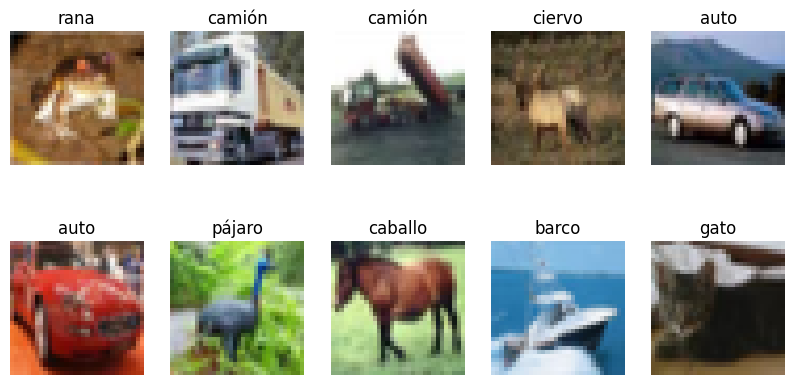

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# 1. Importar y cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Shape de entrenamiento:", x_train.shape)
print("Shape de prueba:", x_test.shape)

# 2. Normalización de los datos (pasar de [0,255] a [0,1])
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 3. Mostrar ejemplos de imágenes con sus etiquetas
# CIFAR-10 tiene 10 clases: avión, auto, pájaro, gato, ciervo, perro, rana, caballo, barco, camión
class_names = ["avión", "auto", "pájaro", "gato", "ciervo", "perro", "rana", "caballo", "barco", "camión"]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


#### Parte 2

In [3]:
import time
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

x_val = x_train[45000:]
y_val = y_train_cat[45000:]
x_train_sub = x_train[:45000]
y_train_sub = y_train_cat[:45000]

model_ann = Sequential([
    Flatten(input_shape=(32, 32, 3)),    # (32x32x3 → 3072)
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_ann.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

start = time.time()

history_ann = model_ann.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_val, y_val),
    epochs=15,
    batch_size=64,
    verbose=1
)
end = time.time()

print(f"⏱ Tiempo de entrenamiento: {end - start:.2f} segundos")

Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2588 - loss: 2.0518 - val_accuracy: 0.3604 - val_loss: 1.7879
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3837 - loss: 1.7131 - val_accuracy: 0.3990 - val_loss: 1.6822
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4152 - loss: 1.6329 - val_accuracy: 0.4434 - val_loss: 1.5837
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4476 - loss: 1.5599 - val_accuracy: 0.4284 - val_loss: 1.6184
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4567 - loss: 1.5205 - val_accuracy: 0.4374 - val_loss: 1.6007
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4671 - loss: 1.4964 - val_accuracy: 0.4590 - val_loss: 1.5161
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4815 - loss: 1.4613 - val_accuracy: 0.4766 - val_loss: 1.4762
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4872 - loss: 1.4414 - val_accuracy: 0.

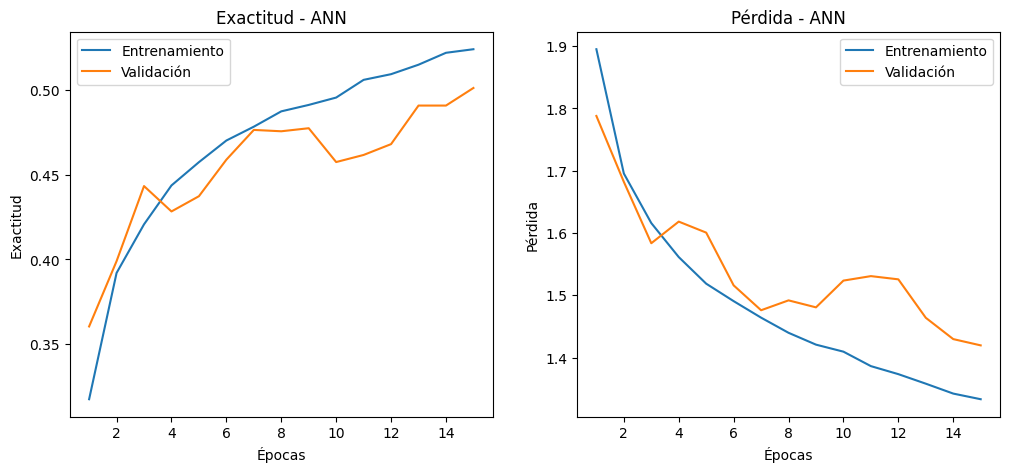

📊 Exactitud en prueba: 49.74%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


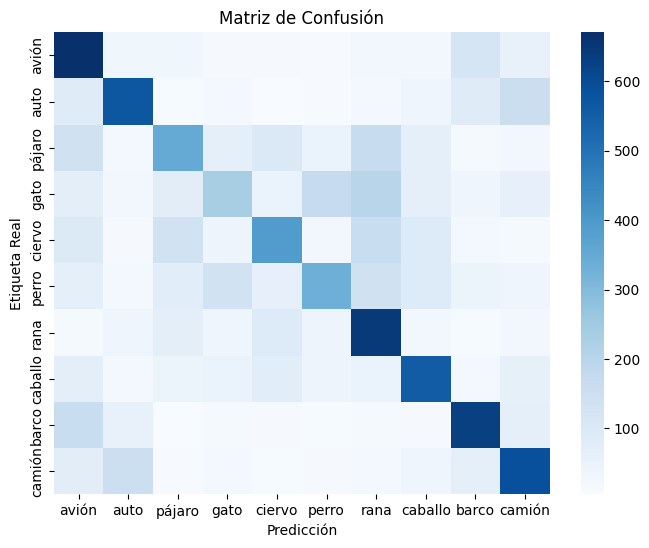

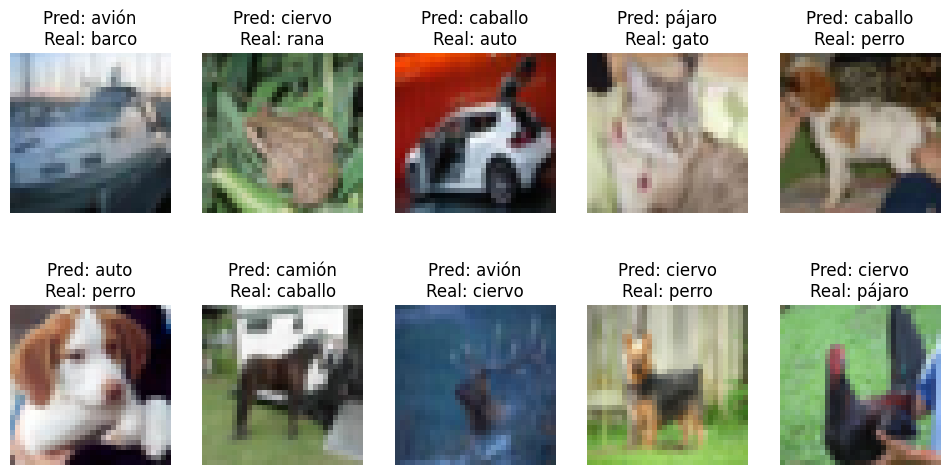

In [7]:
from functions import plot_history, evaluate_model, confusion_and_errors

# Graficar curvas de entrenamiento
plot_history(history_ann, model_name="ANN")

# Evaluar en el conjunto de prueba
evaluate_model(model_ann, x_test, y_test_cat)

# Matriz de confusión y errores
class_names = ["avión", "auto", "pájaro", "gato", "ciervo", 
               "perro", "rana", "caballo", "barco", "camión"]

confusion_and_errors(model_ann, x_test, y_test_cat, class_names)